<h1>Data Analysis and Visualization</h1>

<h2>Read the data</h2>


In [1]:
#Add necessary imports and functions to read the data
import pandas as pd
df = pd.read_csv("yellow_tripdata_small_2016-01.csv")
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-01-25 10:44:43,2016-01-25 10:55:40,1,1.00,-73.980652,40.765316,1,N,-73.989792,40.752026,1,8.5,0.0,0.5,1.85,0.00,0.3,11.15
1,1,2016-01-13 10:19:36,2016-01-13 10:25:41,1,0.80,-73.948990,40.777428,1,N,-73.959045,40.771893,1,6.0,0.0,0.5,1.36,0.00,0.3,8.16
2,2,2016-01-12 00:42:42,2016-01-12 00:51:04,1,2.17,-74.008377,40.735664,1,N,-74.013580,40.707985,1,9.0,0.5,0.5,2.00,0.00,0.3,12.30
3,1,2016-01-10 16:21:17,2016-01-10 16:24:31,1,0.70,-73.961266,40.772495,1,N,-73.955887,40.779671,1,4.5,0.0,0.5,1.30,0.00,0.3,6.60
4,2,2016-01-05 11:29:53,2016-01-05 11:52:24,5,0.78,-73.976532,40.764683,1,N,-73.966904,40.769787,2,13.5,0.0,0.5,0.00,0.00,0.3,14.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090681,2,2016-01-21 07:58:34,2016-01-21 08:10:57,1,1.98,-74.009941,40.720230,1,N,-73.990326,40.731747,1,10.0,0.0,0.5,2.16,0.00,0.3,12.96
1090682,1,2016-01-07 01:15:38,2016-01-07 01:19:36,2,1.10,-73.971550,40.782257,1,N,-73.961464,40.795998,2,5.5,0.5,0.5,0.00,0.00,0.3,6.80
1090683,1,2016-01-09 10:42:32,2016-01-09 10:50:34,2,1.30,-74.000137,40.733067,1,N,-73.999969,40.720318,1,7.5,0.0,0.5,1.65,0.00,0.3,9.95
1090684,1,2016-01-10 15:34:00,2016-01-10 15:56:06,1,8.80,-73.874496,40.774082,1,N,-73.970444,40.795761,1,27.5,0.0,0.5,6.75,5.54,0.3,40.59


<h2>Remove data outside the bounding box</h2>


In [2]:
westlimit=-74.2635; southlimit=40.4856; eastlimit=-73.7526; northlimit=40.9596
#Remove the data that is not within the limits specified above
df = df[(df["pickup_longitude"]>westlimit) & (df["pickup_longitude"]<eastlimit) & (df["pickup_latitude"]>southlimit) & (df["pickup_latitude"]<northlimit)&(df["dropoff_longitude"]>westlimit) & (df["dropoff_longitude"]<eastlimit) & (df["dropoff_latitude"]>southlimit) & (df["dropoff_latitude"]<northlimit)]
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-01-25 10:44:43,2016-01-25 10:55:40,1,1.00,-73.980652,40.765316,1,N,-73.989792,40.752026,1,8.5,0.0,0.5,1.85,0.00,0.3,11.15
1,1,2016-01-13 10:19:36,2016-01-13 10:25:41,1,0.80,-73.948990,40.777428,1,N,-73.959045,40.771893,1,6.0,0.0,0.5,1.36,0.00,0.3,8.16
2,2,2016-01-12 00:42:42,2016-01-12 00:51:04,1,2.17,-74.008377,40.735664,1,N,-74.013580,40.707985,1,9.0,0.5,0.5,2.00,0.00,0.3,12.30
3,1,2016-01-10 16:21:17,2016-01-10 16:24:31,1,0.70,-73.961266,40.772495,1,N,-73.955887,40.779671,1,4.5,0.0,0.5,1.30,0.00,0.3,6.60
4,2,2016-01-05 11:29:53,2016-01-05 11:52:24,5,0.78,-73.976532,40.764683,1,N,-73.966904,40.769787,2,13.5,0.0,0.5,0.00,0.00,0.3,14.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090681,2,2016-01-21 07:58:34,2016-01-21 08:10:57,1,1.98,-74.009941,40.720230,1,N,-73.990326,40.731747,1,10.0,0.0,0.5,2.16,0.00,0.3,12.96
1090682,1,2016-01-07 01:15:38,2016-01-07 01:19:36,2,1.10,-73.971550,40.782257,1,N,-73.961464,40.795998,2,5.5,0.5,0.5,0.00,0.00,0.3,6.80
1090683,1,2016-01-09 10:42:32,2016-01-09 10:50:34,2,1.30,-74.000137,40.733067,1,N,-73.999969,40.720318,1,7.5,0.0,0.5,1.65,0.00,0.3,9.95
1090684,1,2016-01-10 15:34:00,2016-01-10 15:56:06,1,8.80,-73.874496,40.774082,1,N,-73.970444,40.795761,1,27.5,0.0,0.5,6.75,5.54,0.3,40.59


<h2>Add a column for taxi trip duration</h2>
<li>strptime formats: http://pubs.opengroup.org/onlinepubs/009695399/functions/strptime.html

In [3]:
import datetime
df['tpep_pickup_datetime'] = df['tpep_pickup_datetime'].apply(lambda x:datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
df['tpep_dropoff_datetime'] = df['tpep_dropoff_datetime'].apply(lambda x:datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
df

<ipython-input-3-fd69d7cf28ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tpep_pickup_datetime'] = df['tpep_pickup_datetime'].apply(lambda x:datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
<ipython-input-3-fd69d7cf28ed>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tpep_dropoff_datetime'] = df['tpep_dropoff_datetime'].apply(lambda x:datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-01-25 10:44:43,2016-01-25 10:55:40,1,1.00,-73.980652,40.765316,1,N,-73.989792,40.752026,1,8.5,0.0,0.5,1.85,0.00,0.3,11.15
1,1,2016-01-13 10:19:36,2016-01-13 10:25:41,1,0.80,-73.948990,40.777428,1,N,-73.959045,40.771893,1,6.0,0.0,0.5,1.36,0.00,0.3,8.16
2,2,2016-01-12 00:42:42,2016-01-12 00:51:04,1,2.17,-74.008377,40.735664,1,N,-74.013580,40.707985,1,9.0,0.5,0.5,2.00,0.00,0.3,12.30
3,1,2016-01-10 16:21:17,2016-01-10 16:24:31,1,0.70,-73.961266,40.772495,1,N,-73.955887,40.779671,1,4.5,0.0,0.5,1.30,0.00,0.3,6.60
4,2,2016-01-05 11:29:53,2016-01-05 11:52:24,5,0.78,-73.976532,40.764683,1,N,-73.966904,40.769787,2,13.5,0.0,0.5,0.00,0.00,0.3,14.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090681,2,2016-01-21 07:58:34,2016-01-21 08:10:57,1,1.98,-74.009941,40.720230,1,N,-73.990326,40.731747,1,10.0,0.0,0.5,2.16,0.00,0.3,12.96
1090682,1,2016-01-07 01:15:38,2016-01-07 01:19:36,2,1.10,-73.971550,40.782257,1,N,-73.961464,40.795998,2,5.5,0.5,0.5,0.00,0.00,0.3,6.80
1090683,1,2016-01-09 10:42:32,2016-01-09 10:50:34,2,1.30,-74.000137,40.733067,1,N,-73.999969,40.720318,1,7.5,0.0,0.5,1.65,0.00,0.3,9.95
1090684,1,2016-01-10 15:34:00,2016-01-10 15:56:06,1,8.80,-73.874496,40.774082,1,N,-73.970444,40.795761,1,27.5,0.0,0.5,6.75,5.54,0.3,40.59


<h2>Convert duration column into a float (number of seconds)</h2>
<li><span style="color:blue">timedelta64(1, 's')</span> represents one second

In [4]:
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df

<ipython-input-4-27b63b81d35b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,1,2016-01-25 10:44:43,2016-01-25 10:55:40,1,1.00,-73.980652,40.765316,1,N,-73.989792,40.752026,1,8.5,0.0,0.5,1.85,0.00,0.3,11.15,0 days 00:10:57
1,1,2016-01-13 10:19:36,2016-01-13 10:25:41,1,0.80,-73.948990,40.777428,1,N,-73.959045,40.771893,1,6.0,0.0,0.5,1.36,0.00,0.3,8.16,0 days 00:06:05
2,2,2016-01-12 00:42:42,2016-01-12 00:51:04,1,2.17,-74.008377,40.735664,1,N,-74.013580,40.707985,1,9.0,0.5,0.5,2.00,0.00,0.3,12.30,0 days 00:08:22
3,1,2016-01-10 16:21:17,2016-01-10 16:24:31,1,0.70,-73.961266,40.772495,1,N,-73.955887,40.779671,1,4.5,0.0,0.5,1.30,0.00,0.3,6.60,0 days 00:03:14
4,2,2016-01-05 11:29:53,2016-01-05 11:52:24,5,0.78,-73.976532,40.764683,1,N,-73.966904,40.769787,2,13.5,0.0,0.5,0.00,0.00,0.3,14.30,0 days 00:22:31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090681,2,2016-01-21 07:58:34,2016-01-21 08:10:57,1,1.98,-74.009941,40.720230,1,N,-73.990326,40.731747,1,10.0,0.0,0.5,2.16,0.00,0.3,12.96,0 days 00:12:23
1090682,1,2016-01-07 01:15:38,2016-01-07 01:19:36,2,1.10,-73.971550,40.782257,1,N,-73.961464,40.795998,2,5.5,0.5,0.5,0.00,0.00,0.3,6.80,0 days 00:03:58
1090683,1,2016-01-09 10:42:32,2016-01-09 10:50:34,2,1.30,-74.000137,40.733067,1,N,-73.999969,40.720318,1,7.5,0.0,0.5,1.65,0.00,0.3,9.95,0 days 00:08:02
1090684,1,2016-01-10 15:34:00,2016-01-10 15:56:06,1,8.80,-73.874496,40.774082,1,N,-73.970444,40.795761,1,27.5,0.0,0.5,6.75,5.54,0.3,40.59,0 days 00:22:06


In [5]:
import numpy as np
df['duration'] = df['duration'].apply(lambda x:x/np.timedelta64(1,'s'))
df

<ipython-input-5-1ea427ef36b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'] = df['duration'].apply(lambda x:x/np.timedelta64(1,'s'))


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,1,2016-01-25 10:44:43,2016-01-25 10:55:40,1,1.00,-73.980652,40.765316,1,N,-73.989792,40.752026,1,8.5,0.0,0.5,1.85,0.00,0.3,11.15,657.0
1,1,2016-01-13 10:19:36,2016-01-13 10:25:41,1,0.80,-73.948990,40.777428,1,N,-73.959045,40.771893,1,6.0,0.0,0.5,1.36,0.00,0.3,8.16,365.0
2,2,2016-01-12 00:42:42,2016-01-12 00:51:04,1,2.17,-74.008377,40.735664,1,N,-74.013580,40.707985,1,9.0,0.5,0.5,2.00,0.00,0.3,12.30,502.0
3,1,2016-01-10 16:21:17,2016-01-10 16:24:31,1,0.70,-73.961266,40.772495,1,N,-73.955887,40.779671,1,4.5,0.0,0.5,1.30,0.00,0.3,6.60,194.0
4,2,2016-01-05 11:29:53,2016-01-05 11:52:24,5,0.78,-73.976532,40.764683,1,N,-73.966904,40.769787,2,13.5,0.0,0.5,0.00,0.00,0.3,14.30,1351.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090681,2,2016-01-21 07:58:34,2016-01-21 08:10:57,1,1.98,-74.009941,40.720230,1,N,-73.990326,40.731747,1,10.0,0.0,0.5,2.16,0.00,0.3,12.96,743.0
1090682,1,2016-01-07 01:15:38,2016-01-07 01:19:36,2,1.10,-73.971550,40.782257,1,N,-73.961464,40.795998,2,5.5,0.5,0.5,0.00,0.00,0.3,6.80,238.0
1090683,1,2016-01-09 10:42:32,2016-01-09 10:50:34,2,1.30,-74.000137,40.733067,1,N,-73.999969,40.720318,1,7.5,0.0,0.5,1.65,0.00,0.3,9.95,482.0
1090684,1,2016-01-10 15:34:00,2016-01-10 15:56:06,1,8.80,-73.874496,40.774082,1,N,-73.970444,40.795761,1,27.5,0.0,0.5,6.75,5.54,0.3,40.59,1326.0


<h2>Remove data where duration is greater than 10000 seconds</h2>

In [6]:
df = df[df['duration']<10000]
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,1,2016-01-25 10:44:43,2016-01-25 10:55:40,1,1.00,-73.980652,40.765316,1,N,-73.989792,40.752026,1,8.5,0.0,0.5,1.85,0.00,0.3,11.15,657.0
1,1,2016-01-13 10:19:36,2016-01-13 10:25:41,1,0.80,-73.948990,40.777428,1,N,-73.959045,40.771893,1,6.0,0.0,0.5,1.36,0.00,0.3,8.16,365.0
2,2,2016-01-12 00:42:42,2016-01-12 00:51:04,1,2.17,-74.008377,40.735664,1,N,-74.013580,40.707985,1,9.0,0.5,0.5,2.00,0.00,0.3,12.30,502.0
3,1,2016-01-10 16:21:17,2016-01-10 16:24:31,1,0.70,-73.961266,40.772495,1,N,-73.955887,40.779671,1,4.5,0.0,0.5,1.30,0.00,0.3,6.60,194.0
4,2,2016-01-05 11:29:53,2016-01-05 11:52:24,5,0.78,-73.976532,40.764683,1,N,-73.966904,40.769787,2,13.5,0.0,0.5,0.00,0.00,0.3,14.30,1351.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090681,2,2016-01-21 07:58:34,2016-01-21 08:10:57,1,1.98,-74.009941,40.720230,1,N,-73.990326,40.731747,1,10.0,0.0,0.5,2.16,0.00,0.3,12.96,743.0
1090682,1,2016-01-07 01:15:38,2016-01-07 01:19:36,2,1.10,-73.971550,40.782257,1,N,-73.961464,40.795998,2,5.5,0.5,0.5,0.00,0.00,0.3,6.80,238.0
1090683,1,2016-01-09 10:42:32,2016-01-09 10:50:34,2,1.30,-74.000137,40.733067,1,N,-73.999969,40.720318,1,7.5,0.0,0.5,1.65,0.00,0.3,9.95,482.0
1090684,1,2016-01-10 15:34:00,2016-01-10 15:56:06,1,8.80,-73.874496,40.774082,1,N,-73.970444,40.795761,1,27.5,0.0,0.5,6.75,5.54,0.3,40.59,1326.0


<h2>Plot duration and compare with a gamma distribution</h2>

C:\Users\surface\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

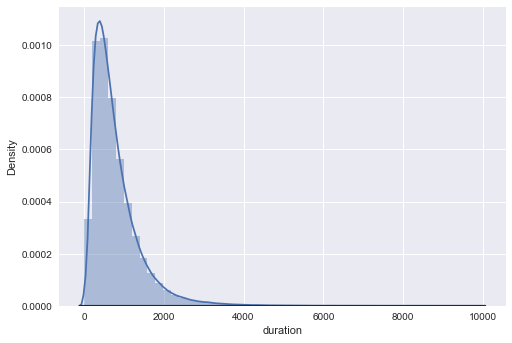

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
plt.style.use('seaborn')
sns.distplot(df['duration'],fit=stats.gamma)

<h2>Plot the scatter plot between trip_distance and duration</h2>

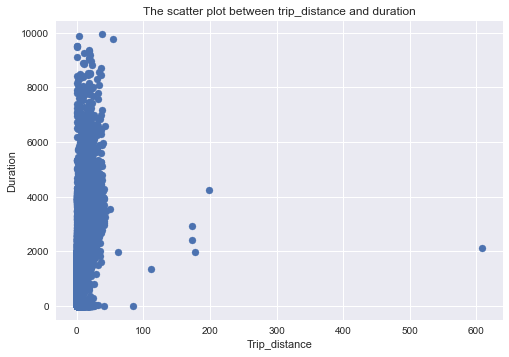

In [8]:
temp_df = df[df["trip_distance"]<100000] # get rid of the outlier
xData = temp_df["trip_distance"]
yData = temp_df["duration"]
plt.scatter(xData,yData)
plt.title('The scatter plot between trip_distance and duration')
plt.xlabel('Trip_distance')
plt.ylabel('Duration')
plt.show()

<h2>Create a column "day_of_week" that puts in an integer for the weekday</h2>
<li>Monday = 1, Sunday = 7
<li>Investigate here! https://docs.python.org/3/library/datetime.html
<li>Use tpep_pickup_datetime to get the weekday

In [9]:
import datetime
df['day_of_week'] = df['tpep_pickup_datetime'].apply(lambda x:datetime.datetime(datetime.datetime.date(x).year,datetime.datetime.date(x).month,datetime.datetime.date(x).day).weekday()+1)
df

<ipython-input-9-8a697457fc8e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_of_week'] = df['tpep_pickup_datetime'].apply(lambda x:datetime.datetime(datetime.datetime.date(x).year,datetime.datetime.date(x).month,datetime.datetime.date(x).day).weekday()+1)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,day_of_week
0,1,2016-01-25 10:44:43,2016-01-25 10:55:40,1,1.00,-73.980652,40.765316,1,N,-73.989792,...,1,8.5,0.0,0.5,1.85,0.00,0.3,11.15,657.0,1
1,1,2016-01-13 10:19:36,2016-01-13 10:25:41,1,0.80,-73.948990,40.777428,1,N,-73.959045,...,1,6.0,0.0,0.5,1.36,0.00,0.3,8.16,365.0,3
2,2,2016-01-12 00:42:42,2016-01-12 00:51:04,1,2.17,-74.008377,40.735664,1,N,-74.013580,...,1,9.0,0.5,0.5,2.00,0.00,0.3,12.30,502.0,2
3,1,2016-01-10 16:21:17,2016-01-10 16:24:31,1,0.70,-73.961266,40.772495,1,N,-73.955887,...,1,4.5,0.0,0.5,1.30,0.00,0.3,6.60,194.0,7
4,2,2016-01-05 11:29:53,2016-01-05 11:52:24,5,0.78,-73.976532,40.764683,1,N,-73.966904,...,2,13.5,0.0,0.5,0.00,0.00,0.3,14.30,1351.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090681,2,2016-01-21 07:58:34,2016-01-21 08:10:57,1,1.98,-74.009941,40.720230,1,N,-73.990326,...,1,10.0,0.0,0.5,2.16,0.00,0.3,12.96,743.0,4
1090682,1,2016-01-07 01:15:38,2016-01-07 01:19:36,2,1.10,-73.971550,40.782257,1,N,-73.961464,...,2,5.5,0.5,0.5,0.00,0.00,0.3,6.80,238.0,4
1090683,1,2016-01-09 10:42:32,2016-01-09 10:50:34,2,1.30,-74.000137,40.733067,1,N,-73.999969,...,1,7.5,0.0,0.5,1.65,0.00,0.3,9.95,482.0,6
1090684,1,2016-01-10 15:34:00,2016-01-10 15:56:06,1,8.80,-73.874496,40.774082,1,N,-73.970444,...,1,27.5,0.0,0.5,6.75,5.54,0.3,40.59,1326.0,7


<h2>Create time of day buckets using the hour part of tpep_pickup_datetime</h2>

In [10]:
df['pickup_hour'] = df['tpep_pickup_datetime'].apply(lambda x:datetime.datetime.time(x).hour)
df

<ipython-input-10-358b3ac70ea1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pickup_hour'] = df['tpep_pickup_datetime'].apply(lambda x:datetime.datetime.time(x).hour)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,day_of_week,pickup_hour
0,1,2016-01-25 10:44:43,2016-01-25 10:55:40,1,1.00,-73.980652,40.765316,1,N,-73.989792,...,8.5,0.0,0.5,1.85,0.00,0.3,11.15,657.0,1,10
1,1,2016-01-13 10:19:36,2016-01-13 10:25:41,1,0.80,-73.948990,40.777428,1,N,-73.959045,...,6.0,0.0,0.5,1.36,0.00,0.3,8.16,365.0,3,10
2,2,2016-01-12 00:42:42,2016-01-12 00:51:04,1,2.17,-74.008377,40.735664,1,N,-74.013580,...,9.0,0.5,0.5,2.00,0.00,0.3,12.30,502.0,2,0
3,1,2016-01-10 16:21:17,2016-01-10 16:24:31,1,0.70,-73.961266,40.772495,1,N,-73.955887,...,4.5,0.0,0.5,1.30,0.00,0.3,6.60,194.0,7,16
4,2,2016-01-05 11:29:53,2016-01-05 11:52:24,5,0.78,-73.976532,40.764683,1,N,-73.966904,...,13.5,0.0,0.5,0.00,0.00,0.3,14.30,1351.0,2,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090681,2,2016-01-21 07:58:34,2016-01-21 08:10:57,1,1.98,-74.009941,40.720230,1,N,-73.990326,...,10.0,0.0,0.5,2.16,0.00,0.3,12.96,743.0,4,7
1090682,1,2016-01-07 01:15:38,2016-01-07 01:19:36,2,1.10,-73.971550,40.782257,1,N,-73.961464,...,5.5,0.5,0.5,0.00,0.00,0.3,6.80,238.0,4,1
1090683,1,2016-01-09 10:42:32,2016-01-09 10:50:34,2,1.30,-74.000137,40.733067,1,N,-73.999969,...,7.5,0.0,0.5,1.65,0.00,0.3,9.95,482.0,6,10
1090684,1,2016-01-10 15:34:00,2016-01-10 15:56:06,1,8.80,-73.874496,40.774082,1,N,-73.970444,...,27.5,0.0,0.5,6.75,5.54,0.3,40.59,1326.0,7,15


<h2>Plot a bar graph that groups the data by day of week and then by time of day</h2>
<li>Do you notice any differences?</li>

<AxesSubplot:xlabel='day_of_week'>

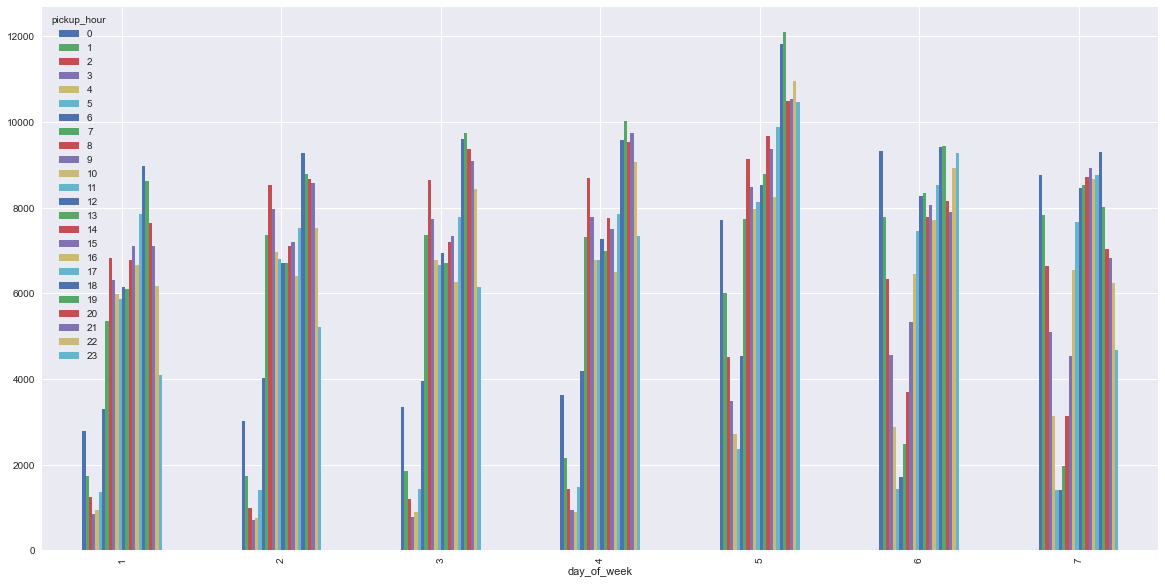

In [11]:
day_time = df.groupby(['day_of_week','pickup_hour'])
day_time.size().unstack().plot(kind='bar',figsize=(20,10))
#Friday has the most pickup over all
#the time of the day with relative high pickups are 18:00 - 20:00 and relative low pickups are 1:00-6:00

<h2>Create zones</h2>

In [12]:
def createZoneTable(zone_factor,westlimit=-74.2635, southlimit=40.4856, eastlimit=-73.7526, northlimit=40.9596):
    zone_table = list()
    #Your code goes here
    delta_lon = (northlimit-southlimit)/zone_factor
    delta_lat = (eastlimit-westlimit)/zone_factor
    lon_list = list()
    lat_list = list()
    id = 0
    
    for i in range(zone_factor+1):  
        lon_list.append(southlimit+i*delta_lon)
        lat_list.append(westlimit+i*delta_lat)
    
    for j in range(len(lon_list)-1):
        for k in range(len(lat_list)-1):
            left_down = [lon_list[j],lat_list[k]]
            right_down = [lon_list[j],lat_list[k+1]]
            right_up = [lon_list[j+1],lat_list[k+1]]
            left_up = [lon_list[j+1],lat_list[k]]
            zone = [left_down,right_down,right_up,left_up,left_down]
            zone_table.append(("%02d" %id,zone))
            id +=1

    return zone_table

Example of a zone table

[('00',
  [[40.4856, -74.2635],
   [40.4856, -74.21240999999999],
   [40.533, -74.21240999999999],
   [40.533, -74.2635],
   [40.4856, -74.2635]]),
 ('01',
  [[40.4856, -74.21240999999999],
   [40.4856, -74.16131999999999],
   [40.533, -74.16131999999999],
   [40.533, -74.21240999999999],
   [40.4856, -74.21240999999999]]),
 ('02',
  [[40.4856, -74.16131999999999],
   [40.4856, -74.11022999999999],
   [40.533, -74.11022999999999],
   [40.533, -74.16131999999999],
   [40.4856, -74.16131999999999]]),
 ('03',
  [[40.4856, -74.11022999999999],
   [40.4856, -74.05913999999999],
   [40.533, -74.05913999999999],
   [40.533, -74.11022999999999],
   [40.4856, -74.11022999999999]]),

In [13]:
def reverse_lon_lat(x):
    for i in range(len(x)):
        x[i] = x[i][::-1]
    return x

In [14]:
def createGeoJsonObject(zone_table):
    zone_data_dict = dict()
    zone_data_dict['type'] = 'FeatureCollection'
    zone_data_dict_features = list()
    zone_data_dict['features'] = zone_data_dict_features
    
    #Your code goes here
    for i in range(len(zone_table)):
        temp_dict = {'geometry': {'coordinates': [reverse_lon_lat(zone_table[i][1])], 'type': 'Polygon'}, 'properties': {'zone_id': zone_table[i][0]}, 'type': 'Feature'}
        zone_data_dict_features.append(temp_dict)
    
    return zone_data_dict

Example of the 'features' list in the geojson object

{'features': [{'geometry': {'coordinates': [[[-74.2635, 40.4856],
      [-74.21240999999999, 40.4856],
      [-74.21240999999999, 40.533],
      [-74.2635, 40.533],
      [-74.2635, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '00'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[-74.21240999999999, 40.4856],
      [-74.16131999999999, 40.4856],
      [-74.16131999999999, 40.533],
      [-74.21240999999999, 40.533],
      [-74.21240999999999, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '01'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[-74.16131999999999, 40.4856],
      [-74.11022999999999, 40.4856],
      [-74.11022999999999, 40.533],
      [-74.16131999999999, 40.533],
      [-74.16131999999999, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '02'},
   'type': 'Feature'},

<h3>Create the zone table for zone_factor = 20</h3>

In [15]:
zone_table = createZoneTable(20,westlimit=-74.2635, southlimit=40.4856, eastlimit=-73.7526, northlimit=40.9596)
zone_table

[('00',
  [[40.4856, -74.2635],
   [40.4856, -74.237955],
   [40.509299999999996, -74.237955],
   [40.509299999999996, -74.2635],
   [40.4856, -74.2635]]),
 ('01',
  [[40.4856, -74.237955],
   [40.4856, -74.21240999999999],
   [40.509299999999996, -74.21240999999999],
   [40.509299999999996, -74.237955],
   [40.4856, -74.237955]]),
 ('02',
  [[40.4856, -74.21240999999999],
   [40.4856, -74.186865],
   [40.509299999999996, -74.186865],
   [40.509299999999996, -74.21240999999999],
   [40.4856, -74.21240999999999]]),
 ('03',
  [[40.4856, -74.186865],
   [40.4856, -74.16131999999999],
   [40.509299999999996, -74.16131999999999],
   [40.509299999999996, -74.186865],
   [40.4856, -74.186865]]),
 ('04',
  [[40.4856, -74.16131999999999],
   [40.4856, -74.135775],
   [40.509299999999996, -74.135775],
   [40.509299999999996, -74.16131999999999],
   [40.4856, -74.16131999999999]]),
 ('05',
  [[40.4856, -74.135775],
   [40.4856, -74.11023],
   [40.509299999999996, -74.11023],
   [40.50929999999999

<h2>Write a function that returns a zone number given a latitude and a longitude</h2>

<li>The function should return a string zone number
<li>For the example, <span style="color:blue">get_zone(-74.19,40.65)</span> the function should return "62" (for a zone factor of 20, assuming you have numbered the zones from 1 to 400)

In [16]:
def get_zone(lon,lat,zone_table):
    
    #Your code goes here
    for i in range(len(zone_table)):
        if (zone_table[i][1][0][0]<=lat<=zone_table[i][1][2][0]) and (zone_table[i][1][0][1]<=lon<=zone_table[i][1][2][1]):
            zone = i
    return zone

get_zone(-74.19,40.65,zone_table)

122

<h2>Create  pickup_zone and dropoff_zone columns for the dataframe</h2>
<li>This is a little tricky
<li>Pandas 'apply' function applies a function to each row in turn


<h4>apply</h4>

df.apply(foo)<br>
translates to<br>
foo(row1)<br>
foo(row2)<br>
foo(row3)<br>
i.e., the table row is the implicit argument of foo.
<p>
If we want to write our own foo, the argument to foo will be a dataframe row.<p>
From this row, we can extract the values we want and pass it to the explicit arguments of foo
<p>


In [17]:
import pandas as pd
df_sample = pd.DataFrame([[1,5,7],[2,4,6],[3,9,2]],columns=['A','B','C'])

print(df_sample)
def foo(x,y):
    return x+y

df_sample['new_col'] = df_sample.apply(lambda x: foo(x['A'],x['B']),axis=1)
#axis = 1 means extract data from rows of the dataframe. by default, it extracts from columns. (Set axis to 0 and see what happens)

df_sample

   A  B  C
0  1  5  7
1  2  4  6
2  3  9  2


,A,B,C,new_col
0,1,5,7,6
1,2,4,6,6
2,3,9,2,12


In [18]:
df['pickup_zone'] = df.apply(lambda x: get_zone(x['pickup_longitude'],x['pickup_latitude'],zone_table),axis=1)
df['dropoff_zone'] = df.apply(lambda x: get_zone(x['dropoff_longitude'],x['dropoff_latitude'],zone_table),axis=1)

<ipython-input-18-43a98d89baa8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pickup_zone'] = df.apply(lambda x: get_zone(x['pickup_longitude'],x['pickup_latitude'],zone_table),axis=1)
<ipython-input-18-43a98d89baa8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dropoff_zone'] = df.apply(lambda x: get_zone(x['dropoff_longitude'],x['dropoff_latitude'],zone_table),axis=1)


In [19]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,day_of_week,pickup_hour,pickup_zone,dropoff_zone
0,1,2016-01-25 10:44:43,2016-01-25 10:55:40,1,1.00,-73.980652,40.765316,1,N,-73.989792,...,0.5,1.85,0.00,0.3,11.15,657.0,1,10,231,230
1,1,2016-01-13 10:19:36,2016-01-13 10:25:41,1,0.80,-73.948990,40.777428,1,N,-73.959045,...,0.5,1.36,0.00,0.3,8.16,365.0,3,10,252,251
2,2,2016-01-12 00:42:42,2016-01-12 00:51:04,1,2.17,-74.008377,40.735664,1,N,-74.013580,...,0.5,2.00,0.00,0.3,12.30,502.0,2,0,209,189
3,1,2016-01-10 16:21:17,2016-01-10 16:24:31,1,0.70,-73.961266,40.772495,1,N,-73.955887,...,0.5,1.30,0.00,0.3,6.60,194.0,7,16,251,252
4,2,2016-01-05 11:29:53,2016-01-05 11:52:24,5,0.78,-73.976532,40.764683,1,N,-73.966904,...,0.5,0.00,0.00,0.3,14.30,1351.0,2,11,231,231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090681,2,2016-01-21 07:58:34,2016-01-21 08:10:57,1,1.98,-74.009941,40.720230,1,N,-73.990326,...,0.5,2.16,0.00,0.3,12.96,743.0,4,7,189,210
1090682,1,2016-01-07 01:15:38,2016-01-07 01:19:36,2,1.10,-73.971550,40.782257,1,N,-73.961464,...,0.5,0.00,0.00,0.3,6.80,238.0,4,1,251,271
1090683,1,2016-01-09 10:42:32,2016-01-09 10:50:34,2,1.30,-74.000137,40.733067,1,N,-73.999969,...,0.5,1.65,0.00,0.3,9.95,482.0,6,10,210,190
1090684,1,2016-01-10 15:34:00,2016-01-10 15:56:06,1,8.80,-73.874496,40.774082,1,N,-73.970444,...,0.5,6.75,5.54,0.3,40.59,1326.0,7,15,255,271


<h2>Calculate the following</h2>
<li>Percentage of the total rides where the pickup zone is the same as the dropoff zone
<li>Zone with the highest pickups
<li>Zone with the highest dropoffs

In [20]:
#Percentage of the total rides where the pickup zone is the same as the dropoff zone
temp_df = np.where(df["pickup_zone"] == df['dropoff_zone'],1,0)
pct_same_pickup_dropoff_zone=temp_df.sum()/df.shape[0]
print("The Percentage of the total rides where the pickup zone is the same as the dropoff zone is "+str(round(pct_same_pickup_dropoff_zone*100,2))+"%")

The Percentage of the total rides where the pickup zone is the same as the dropoff zone is 23.67%


In [21]:
#Zone with the highest pickups
print("The zone with the highest pickups is",df.groupby("pickup_zone").size().idxmax())

The zone with the highest pickups is 231


In [22]:
#Zone with the highest dropoffs
df_highest_dropoffs = pd.DataFrame(df.groupby("dropoff_zone").size())
print("The zone with the highest dropoffs is",df.groupby("dropoff_zone").size().idxmax())

The zone with the highest dropoffs is 231


<h2>Groupby analysis</h2>
<li>Group data by the hour of the day and by the pickup zone
<li>Draw a figure of 24 plots that show the top 5 pickup zones at each hour


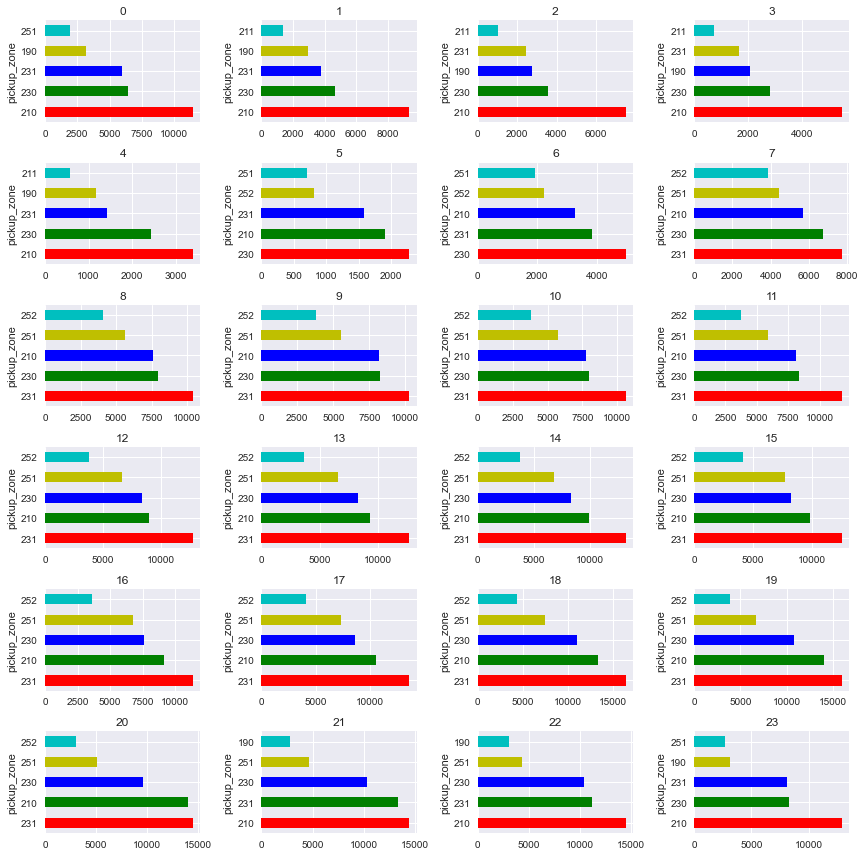

In [23]:
hour_zone = df.groupby(['pickup_zone','pickup_hour']).size().unstack()
    
%matplotlib inline 
COL_NUM = 4 
ROW_NUM = 6
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,12))

colors = ['r','g','b','y','c']
for i, (label,hour) in enumerate(hour_zone.items()):
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    hour_zone_plot = hour.sort_values(ascending=False)[:5] 
    hour_zone_plot.plot(kind='barh', ax=ax, color = colors)
    ax.set_title(label)

plt.tight_layout() 

<h2>Groupby analysis 2</h2>
<li>Group data by the weekday and the pickup zone
<li>Draw a figure of 7 plots that show the top 5 pickup zones on each day

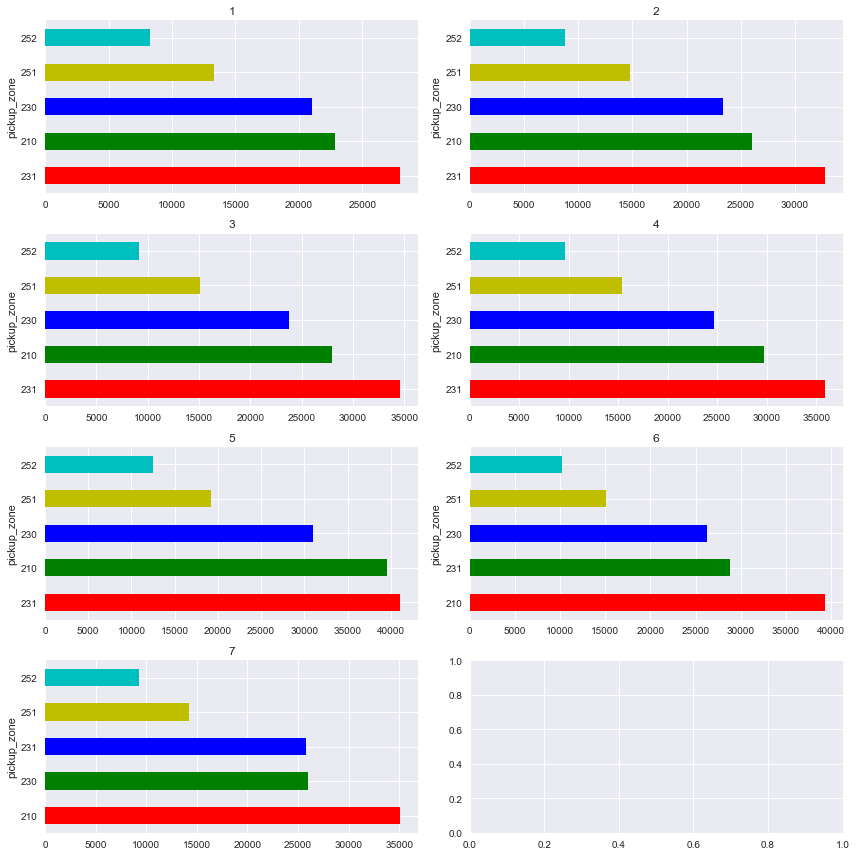

In [24]:
day_zone = df.groupby(['pickup_zone','day_of_week']).size().unstack()
    
%matplotlib inline 
COL_NUM = 2 
ROW_NUM = 4
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,12))

colors = ['r','g','b','y','c']
for i, (label,day) in enumerate(day_zone.items()):
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    day_zone_plot = day.sort_values(ascending=False)[:5] 
    day_zone_plot.plot(kind='barh', ax=ax, color = colors)
    ax.set_title(label)

plt.tight_layout() 

<h1>Most frequent morning pickups</h1>
<li>Identify the most frequent pickup zone between 8 am and 9 am on a weekday



In [25]:
weekday_df = df[df["day_of_week"]<6]
weekday_hour_zone = weekday_df.groupby(['pickup_hour','pickup_zone']).size().unstack()
print("The most frequent pickup zone between 8 am and 9 am on a weekday is",weekday_hour_zone.iloc[8].idxmax())

The most frequent pickup zone between 8 am and 9 am on a weekday is 231


<h2>Mapping</h2>
<li>Draw a folium map using the polygon geojson object and the counts dataframe (see class example)

In [26]:
import folium

In [27]:
zonegeojson = createGeoJsonObject(zone_table)
zonegeojson

{'type': 'FeatureCollection',
 'features': [{'geometry': {'coordinates': [[[-74.2635, 40.4856],
      [-74.237955, 40.4856],
      [-74.237955, 40.509299999999996],
      [-74.2635, 40.509299999999996],
      [-74.2635, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '00'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[-74.237955, 40.4856],
      [-74.21240999999999, 40.4856],
      [-74.21240999999999, 40.509299999999996],
      [-74.237955, 40.509299999999996],
      [-74.237955, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '01'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[-74.21240999999999, 40.4856],
      [-74.186865, 40.4856],
      [-74.186865, 40.509299999999996],
      [-74.21240999999999, 40.509299999999996],
      [-74.21240999999999, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '02'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[-74.186865, 40.4856],
      [-74.16131999999999, 40.4

In [28]:
zone_start_df = pd.DataFrame(df.groupby("pickup_zone").size())
zone_start_df.columns =["# of Trips"]
zone_start_df.reset_index(level=0, inplace=True)
zone_start_df["pickup_zone"]=zone_start_df["pickup_zone"].astype("str")
zone_start_df

,pickup_zone,# of Trips
0,24,1
1,49,1
2,65,1
3,66,1
4,70,5
...,...,...
202,384,1
203,387,2
204,389,1
205,395,1


In [29]:
import folium
#Center the map at Times Square
m = folium.Map(location = [40.7585,-73.9844],zoom_start=12)

In [30]:
m.choropleth(geo_data=zonegeojson, data=zone_start_df,
             columns=['pickup_zone','# of Trips'],
             key_on='feature.properties.zone_id',
             fill_color='RdYlGn_r', fill_opacity=0.6, line_opacity=0.8,
             legend_name='Distribution of pickup zone')
folium.LayerControl().add_to(m)

C:\Users\surface\anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [31]:
m